## CTR

In [21]:
#coding=utf-8
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.externals import joblib
from sklearn.preprocessing.data import OneHotEncoder
import json
import xgboost as xgb
import os
os.environ["OMP_NUM_THREADS"] = "6"  #并行训练
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

#### 读取train_data

In [22]:
def _load_data(data_file,feature_list):
    data_df = pd.read_csv(filepath_or_buffer = data_file,sep=",", header=None, 
                              names=feature_list)
    return data_df

In [23]:
buy_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1220/buy_all_balance_feature.csv'
not_buy_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1220/not_buy_all_balance_feature.csv'
goods_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1212/goods_feature_1.csv'
user_file ='/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1216/user_feature_less.csv'
 #'/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1214/user_feature.csv'


In [24]:
buy_feature_list = ['index','second_id','s_slug','label']
not_buy_feature_list = ['index','second_id','s_slug','date','label']
#ser_feature_list = ['second_id','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40','41','42','43','44', '45','46','47','48','49','50','51']
user_feature_list = ['second_id', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label']
goods_feature_list = ['goods_slug', '1', '2','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_1', 'p_7394376616792', 'p_7394376616815', 'p_ea10days_1512g', 'p_ea_3daypttp', 'p_easyace_ysjnew_xmy_190828', 'p_easyfun_madai_tea_20', 'p_ef_funsichi_nwlb', 'p_ef_zkxsd_757g', 's_1upbar_20190308', 's_ES_20190724', 's_bh_BH20F_mini_charge', 's_bu_BH20SW_white', 's_cm25_green_coffee_140ml', 's_cm25_gxmydr_300g', 's_cm25_shucai_50g', 's_cm25_yyb_384g', 's_cm25_yykkxin_420g_new_190103', 's_coffee_190819_1_1', 's_ea_dcnx_240g', 's_ea_xckfy_350g', 's_ea_ximeiyin_210ml', 's_ea_yyrtg_36g', 's_ea_yyyxcw_420g', 's_easyace_kfdby_400g', 's_easyace_ysj_new_28g', 's_easyfun_beefdoupu_150g', 's_easyfun_beefrice_160g', 's_easyfun_blackrice_xjyz_zs_qyz', 's_easyfun_chia_120g_180604', 's_easyfun_chiaoat_300g', 's_easyfun_cold_coffee_30g', 's_easyfun_curryrice_160g', 's_easyfun_dizhijixiongrou_100g', 's_easyfun_dongyingong_350g', 's_easyfun_geshidongka_100g', 's_easyfun_guodong_new_360g', 's_easyfun_heimiquan_240g', 's_easyfun_jrw_new_120g', 's_easyfun_jzbc_130g_180709', 's_easyfun_nanguatang_154g', 's_easyfun_niurougan_250g', 's_easyfun_niurougan_250g_180808', 's_easyfun_qmmb_600g', 's_easyfun_sausage_300g', 's_easyfun_suannaigan_200g', 's_easyfun_surou_180815', 's_easyfun_wc_21wancan', 's_easyfun_ximeigan_240g', 's_easyfun_yingzuidou_180g', 's_easyfun_yumixu_tea_40g', 's_easyfun_zimiquan_240g', 's_easyfun_zishuzhou_350g', 's_easys_52_qingduanshi', 's_ef_beef_spiced_100g', 's_ef_dzbtwl_300g', 's_ef_dzdqjrb_80g', 's_ef_dzhjjrc_300g', 's_ef_dzmys_150g', 's_ef_gdbwbdg_50g', 's_ef_gdbxsy_tj_25g', 's_ef_xgscrp_37g', 's_ef_ysalb_160g', 's_ef_yyfs_beef_41g', 's_ef_zuizuidong_360g', 's_gaodanbai_180g', 's_oday_dbb_both_240g', 's_oday_jxr_xl_190604', 's_oday_qiyazibinggan_256g', 's_qianka_1000k_qingliang_20190703', 's_qianka_1000k_zhongkou_20190703']

In [25]:
buy_df = _load_data(buy_file,buy_feature_list)
buy_df = buy_df[['second_id','s_slug','label']]
not_buy_df = _load_data(not_buy_file,not_buy_feature_list)
not_buy_df = not_buy_df[['second_id','s_slug','label']]
buy_and_not_buy_df = pd.concat([buy_df,not_buy_df])
buy_and_not_buy_df = buy_and_not_buy_df.sample(frac = 1)
goods_df = _load_data(goods_file,goods_feature_list)
user_df = _load_data(user_file,user_feature_list)

/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [26]:
#这三个类别不平衡
buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_ef_dzhjjrc_300g')]
buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_coffee_190819_1_1')]
buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_ef_dzdqjrb_80g')]

In [27]:
buy_and_not_buy_df['s_slug'].value_counts()

p_7394376616815                      41422
p_easyace_ysjnew_xmy_190828          41004
s_easyfun_cold_coffee_30g            40788
s_qianka_1000k_zhongkou_20190703     40400
s_bu_BH20SW_white                    40241
s_ef_dzbtwl_300g                     40129
s_ef_zuizuidong_360g                 40093
s_cm25_yyb_384g                      40000
s_easyfun_geshidongka_100g           40000
s_cm25_shucai_50g                    40000
s_easyfun_dizhijixiongrou_100g       40000
p_easyfun_madai_tea_20               40000
s_easyfun_suannaigan_200g            40000
s_easyfun_zishuzhou_350g             40000
s_ef_yyfs_beef_41g                   40000
s_easyace_ysj_new_28g                40000
s_easyfun_guodong_new_360g           40000
s_ef_xgscrp_37g                      40000
s_easyfun_niurougan_250g             40000
s_easyfun_qmmb_600g                  40000
s_easyfun_chia_120g_180604           40000
s_easyfun_yumixu_tea_40g             40000
s_ef_dzmys_150g                      40000
s_gaodanbai

In [28]:
print(buy_and_not_buy_df['label'].value_counts())

0        1249362
1        1200629
1         131071
0          92593
label          2
Name: label, dtype: int64


In [5]:
#goods_df = _load_data(goods_file,goods_feature_list)
#goods_df =goods_df[~goods_df['goods_slug'].isin(['goods_slug'])]

In [29]:
user_df = user_df.drop_duplicates('second_id')

In [30]:
buy_and_not_buy_df =buy_and_not_buy_df[~buy_and_not_buy_df['second_id'].isin(['second_id'])]
goods_df =goods_df[~goods_df['goods_slug'].isin(['goods_slug'])]
user_df =user_df[~user_df['second_id'].isin(['second_id'])]

### 合并数据

In [31]:
#user_df =user_df[~user_df['second_id'].isin(['0.0'])]
#user_df['second_id'] = user_df[['second_id']].applymap(np.int64)
#user_df['second_id'] = user_df['second_id'].astype(str)

In [32]:
buy_and_not_buy_user_df = pd.merge(buy_and_not_buy_df,user_df,on='second_id',how='inner')
buy_and_not_buy_user_goods_df = pd.merge(buy_and_not_buy_user_df,goods_df,left_on='s_slug',right_on='goods_slug',how='inner')

In [33]:
buy_and_not_buy_user_goods_df['label'].value_counts()

1    1059985
0     102996
1      14570
0      10511
Name: label, dtype: int64

In [34]:
del buy_and_not_buy_user_goods_df['second_id']
del buy_and_not_buy_user_goods_df['s_slug']
#del buy_and_not_buy_user_goods_df['date']
del buy_and_not_buy_user_goods_df['goods_slug']

In [35]:
feature_list = buy_and_not_buy_user_goods_df.columns.tolist()

In [36]:
#for i in feature_list:
    #buy_and_not_buy_user_goods_df[i]=buy_and_not_buy_user_goods_df[i].astype('float32')

In [37]:
#for i in range(1,77):
    #buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.rename(columns={i:'%s'%i})

In [38]:
#change_feature_list = [' EA代餐', ' EA小助手', ' EF轻主食', ' EF轻小食', ' EF轻烘焙', ' EF轻肉食', ' EF轻配餐', ' EF轻饮', ' EF轻麦片', ' 设备']
#num=1
#for i in change_feature_list:
    #buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.rename(columns={i:'EA%s'%num})
    #num+=1
#del num

### 取出数据和label

In [39]:
buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.apply(pd.to_numeric)

In [40]:
buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.sample(frac = 1)

In [41]:
print(buy_and_not_buy_user_goods_df.columns.tolist())

['label', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label', '1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', '

In [137]:
#del buy_and_not_buy_user_goods_df['index']

In [42]:
train_df, test_df = train_test_split(buy_and_not_buy_user_goods_df, test_size=0.2, random_state=30)

In [43]:
y_train = train_df['label']  # training label
y_test = test_df['label']   # testing label
X_train = train_df.drop('label', axis=1)  # training dataset
X_test = test_df.drop('label', axis=1)  # testing dataset

# XGBoost+LR

In [44]:
# 定义xgb模型
xgboost = xgb.XGBClassifier(max_leaf_nodes=30,nthread=-1, n_jobs=-1,learning_rate=0.08,
                    n_estimators=100, max_depth=5, gamma=0, subsample=0.9, colsample_bytree=0.5)
# 训练xgb学习
xgboost.fit(X_train, y_train)

# 预测xgb及AUC评测
y_pred_test = xgboost.predict_proba(X_test)[:, 1]
xgb_test_auc = roc_auc_score(y_test, y_pred_test)
print('xgboost test auc: %.5f' % xgb_test_auc)

# xgboost编码原有特征
X_train_leaves = xgboost.apply(X_train)
X_test_leaves = xgboost.apply(X_test)

# 合并编码后的训练数据和测试数据
All_leaves = np.concatenate((X_train_leaves, X_test_leaves), axis=0)
All_leaves = All_leaves.astype(np.int32)

# 对所有特征进行ont-hot编码
xgbenc = OneHotEncoder()
X_trans = xgbenc.fit_transform(All_leaves)
(train_rows, cols) = X_train_leaves.shape

# 定义LR模型
lr_1 = LogisticRegression(n_jobs=-1)
# lr对xgboost特征编码后的样本模型训练
lr_1.fit(X_trans[:train_rows, :], y_train)
# 预测及AUC评测
y_pred_xgblr1 = lr_1.predict_proba(X_trans[train_rows:, :])[:, 1]
xgb_lr_auc1 = roc_auc_score(y_test, y_pred_xgblr1)
print('基于Xgb特征编码后的LR AUC: %.5f' % xgb_lr_auc1)

# 定义LR模型
#lr_2 = LogisticRegression(n_jobs=-1,penalty='l2')
# 组合特征，把编码后的特征与原始特征组合
#X_train_ext = hstack([X_trans[:train_rows, :], X_train])
#X_test_ext = hstack([X_trans[train_rows:, :], X_test])

# lr对组合特征的样本模型训练
#lr_2.fit(X_train_ext, y_train)

# 预测及AUC评测
#y_pred_xgblr2 = lr_2.predict_proba(X_test_ext)[:, 1]
#xgb_lr_auc2 = roc_auc_score(y_test, y_pred_xgblr2)
#print('基于组合特征的LR AUC: %.5f' % xgb_lr_auc2)

xgboost test auc: 0.76443
基于Xgb特征编码后的LR AUC: 0.78212


In [113]:
importances = lr.feature_importances_
indices = np.argsort(importances)[::-1]

 1) 68                             0.030544
 2) EA4                            0.029896
 3) EA6                            0.025721
 4) num_paid                       0.024253
 5) class_4                        0.022865
 6) EA10                           0.021427
 7) total_cost                     0.021416
 8) 2                              0.021137
 9) 41                             0.020252
10) 73                             0.020165
11) 37                             0.019044
12) EA1                            0.018375
13) 60                             0.017743
14) 10                             0.017242
15) 43                             0.016922
16) add_cart_count                 0.015728
17) s_ES_20190724                  0.015237
18) class_2                        0.013782
19) 27                             0.013604
20) EA3                            0.013387
21) 30                             0.012380
22) 35                             0.012259
23) s_oday_jxr_xl_190604        

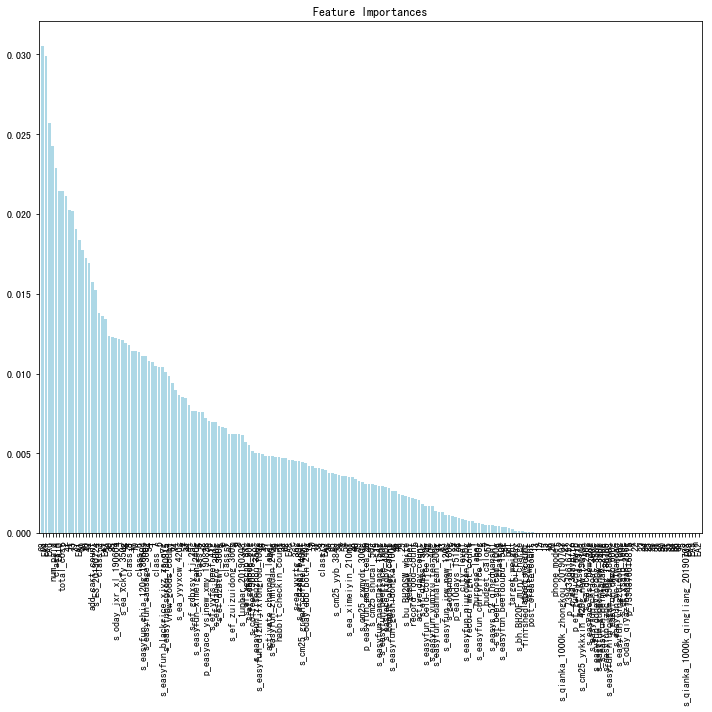

In [117]:
feat_labels_list = X_train.columns.tolist()
feat_labels = np.array(feat_labels_list)
import matplotlib.pyplot as plt
%matplotlib inline
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [110]:
col_name = list(X_train.columns)
m = {}
for i in range(len(col_name)):
    m.setdefault(col_name[i], 0)
    m[col_name[i]] = lr.coef_[0][i]
sorted(m.items(), key=lambda x: x[1], reverse=True)

[('70', 5.0690867349064925),
 ('s_cm25_shucai_50g', 1.2910983154353735),
 ('s_easyfun_niurougan_250g', 0.9341657654604647),
 ('27', 0.8745975613392774),
 ('post_create_count', 0.7937107261584062),
 ('s_easyfun_nanguatang_154g', 0.7531684953685507),
 ('33', 0.7043742737402041),
 ('city_level', 0.6192889063530026),
 ('s_cm25_yykkxin_420g_new_190103', 0.6081969801949507),
 ('s_ef_dzbtwl_300g', 0.5893655070065333),
 ('s_easyfun_jrw_new_120g', 0.5592001949085471),
 ('y', 0.5417225895240567),
 ('s_easyfun_wc_21wancan', 0.4929955175955857),
 ('s_easyfun_ximeigan_240g', 0.48339856925754465),
 ('8', 0.4425882035946568),
 ('26', 0.4193165486302701),
 ('p_ef_zkxsd_757g', 0.4034904216108875),
 ('11', 0.39269151281659287),
 ('41', 0.3652144571428826),
 ('39', 0.3484924455717244),
 ('19', 0.34573289886519804),
 ('66', 0.2910977980720874),
 ('s_ef_dzmys_150g', 0.2803302470604073),
 ('p_easyfun_madai_tea_20', 0.27124150137199315),
 ('s_easyfun_niurougan_250g_180808', 0.26777061810181696),
 ('z', 0.265

In [ ]:
#70控制热量
#27即食
#33小袋装
#8Easy Fun 轻饮麦片
#26Easy Ace 其他

In [45]:
joblib.dump(xgboost, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgboost')
joblib.dump(lr_1, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/lr_1')
joblib.dump(xgbenc, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgbenc')

['/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgbenc']

In [17]:
#lr_1 = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/lr_1')
#xgboost = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgboost')
#xgbenc = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgbenc')

In [46]:
# 准确率
y_pred_xgblr1 = np.rint(y_pred_xgblr1)
accuracy = metrics.accuracy_score(y_test, y_pred_xgblr1) 
print("Test Accuracy: %s"%(accuracy))
# 召回率
recall = metrics.recall_score(y_test, y_pred_xgblr1) 
print("Test Recall: %s"%(recall))
# F1值
f1 = metrics.f1_score(y_test, y_pred_xgblr1) 
print("Test F1: %s"%(f1))

Test Accuracy: 0.9062467120906684
Test Recall: 0.996275986630792
Test F1: 0.9505308435538206


In [ ]:
#效果：不对user做特征工程，正负样本比例3:1，AUC=0.91，准确率=0.84，召回率=0.63，F1=0.65
     #对user做特征工程,0.98072,0.9601831494442987,0.9960948695901405,0.9657172629385203
#user特征工程后merge大大减少？？

# predict

In [47]:
predict_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/predict_user_feature_data/1222/predict_user_featuere_1.csv'
predict_feature_list = ['second_id', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label']
predict_user_df = _load_data(predict_file,predict_feature_list)

/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [48]:
predict_user_df = predict_user_df.drop_duplicates('second_id')

In [49]:
predict_user_df =predict_user_df[~predict_user_df['second_id'].isin(['second_id'])]

In [50]:
predict_user_df['second_id'] = predict_user_df['second_id'].astype(int)

In [51]:
predict_user_df = predict_user_df.apply(pd.to_numeric)

In [52]:
goods_feature_list_2 = ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_1', 'p_7394376616792', 'p_7394376616815', 'p_ea10days_1512g', 'p_ea_3daypttp', 'p_easyace_ysjnew_xmy_190828', 'p_easyfun_madai_tea_20', 'p_ef_funsichi_nwlb', 'p_ef_zkxsd_757g', 's_1upbar_20190308', 's_ES_20190724', 's_bh_BH20F_mini_charge', 's_bu_BH20SW_white', 's_cm25_green_coffee_140ml', 's_cm25_gxmydr_300g', 's_cm25_shucai_50g', 's_cm25_yyb_384g', 's_cm25_yykkxin_420g_new_190103', 's_coffee_190819_1_1', 's_ea_dcnx_240g', 's_ea_xckfy_350g', 's_ea_ximeiyin_210ml', 's_ea_yyrtg_36g', 's_ea_yyyxcw_420g', 's_easyace_kfdby_400g', 's_easyace_ysj_new_28g', 's_easyfun_beefdoupu_150g', 's_easyfun_beefrice_160g', 's_easyfun_blackrice_xjyz_zs_qyz', 's_easyfun_chia_120g_180604', 's_easyfun_chiaoat_300g', 's_easyfun_cold_coffee_30g', 's_easyfun_curryrice_160g', 's_easyfun_dizhijixiongrou_100g', 's_easyfun_dongyingong_350g', 's_easyfun_geshidongka_100g', 's_easyfun_guodong_new_360g', 's_easyfun_heimiquan_240g', 's_easyfun_jrw_new_120g', 's_easyfun_jzbc_130g_180709', 's_easyfun_nanguatang_154g', 's_easyfun_niurougan_250g', 's_easyfun_niurougan_250g_180808', 's_easyfun_qmmb_600g', 's_easyfun_sausage_300g', 's_easyfun_suannaigan_200g', 's_easyfun_surou_180815', 's_easyfun_wc_21wancan', 's_easyfun_ximeigan_240g', 's_easyfun_yingzuidou_180g', 's_easyfun_yumixu_tea_40g', 's_easyfun_zimiquan_240g', 's_easyfun_zishuzhou_350g', 's_easys_52_qingduanshi', 's_ef_beef_spiced_100g', 's_ef_dzbtwl_300g', 's_ef_dzdqjrb_80g', 's_ef_dzhjjrc_300g', 's_ef_dzmys_150g', 's_ef_gdbwbdg_50g', 's_ef_gdbxsy_tj_25g', 's_ef_xgscrp_37g', 's_ef_ysalb_160g', 's_ef_yyfs_beef_41g', 's_ef_zuizuidong_360g', 's_gaodanbai_180g', 's_oday_dbb_both_240g', 's_oday_jxr_xl_190604', 's_oday_qiyazibinggan_256g', 's_qianka_1000k_qingliang_20190703', 's_qianka_1000k_zhongkou_20190703']
for i in goods_feature_list_2:
    goods_df[i]=goods_df[i].astype('float32')

In [53]:
predict_user_df_1 = predict_user_df.tail(3000)

In [ ]:
##目标是将需要预测的样本映射成onehot向量，就可以直接放入lr得到结果了。肯定不要用所有训练数据，不然就出来很慢。可以多学习onehotencoder的使用
#会不会原始item数据有问题，商品池？
#为什么AUC会好？
#集中的那几个item都是在数据库中没有买过的,都是靠单品或者套餐映射过去的，这里可能的问题：一个单品存在于两个多规格，然后我把他映射为其中一个多规格了。所以这个多规格就多出来很多点击数据。                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #找徐志拉

user_recommender_dict={}
def fun_1(name,q):  
    for index, row in predict_user_df_1.iterrows():
        #%time user_tmp_df = row.to_frame().T
        #user_id = predict_user_df.loc[indexs].values.tolist()[0]
        #%time user_id = int(user_tmp_df.iloc[0,0])
        user_id = int(row['second_id'])
        recommendation_list = []
        out_dict={}
        for goods_index, row_2 in goods_df.iterrows():
            #%time goods_tmp_df = row_2.to_frame().T
            #%time s_slug = goods_tmp_df.iloc[0,0]
            s_slug = row_2['goods_slug']
            s2= pd.concat([row,row_2])
            df2 = s2.to_frame().T
            #s_slug = goods_df.loc[goods_indexs].values.tolist()[0]\
            #%time df2 = pd.concat([user_tmp_df.reset_index(drop=True),goods_tmp_df.reset_index(drop=True)],axis=1)
            #action_df = pd.DataFrame(columns=['second_id','s_slug'],data=[(user_id,s_slug),])  
            #df1 = pd.merge(action_df,user_tmp_df,on='second_id',how='inner')
            #df2 = pd.merge(df1,goods_tmp_df,left_on='s_slug',right_on='goods_slug',how='inner') 
            del df2['second_id']
            del df2['goods_slug']
            #for i in feature_list:
                #df2[i]=df2[i].astype('float32')
            #for i in range(1,77):
                #df2 = df2.rename(columns={i:'%s'%i})
            #change_feature_list = [' EA代餐', ' EA小助手', ' EF轻主食', ' EF轻小食', ' EF轻烘焙', ' EF轻肉食', ' EF轻配餐', ' EF轻饮', ' EF轻麦片', ' 设备']
            #num=1
            #for i in change_feature_list:
                #df2 = df2.rename(columns={i:'EA%s'%num})
                #num+=1
            #del num
            df2 = df2.apply(pd.to_numeric)
            predict_leaves = xgboost.apply(df2)
            #print('1')
            #predict_leaves = np.concatenate((uu,predict_leaves), axis=0)
            #(all_rows, cols) = uu.shape
            #X_predict = xgbenc.fit_transform(predict_leaves.reshape(1, -1))
            predict_a=xgbenc.transform(predict_leaves).toarray()
            #X_predict_ext = hstack([predict_a, df2])
            #predict_test = lr_1.predict_proba(X_predict_ext)[:, 1]
            predict_test=lr_1.predict_proba(predict_a)[:, 1]
            if  s_slug=='s_cm25_shucai_50g' or s_slug=='s_qianka_1000k_qingliang_20190703' or s_slug=='s_qianka_1000k_zhongkou_20190703':
                score = predict_test[0] - 0.0001
            elif s_slug == 's_easyfun_wc_21wancan':
                score = predict_test[0] - 0.00005
            elif s_slug=='s_easyfun_curryrice_160g' or s_slug=='s_cm25_yykkxin_420g_new_190103' or s_slug=='p_easyfun_madai_tea_20':
                score = predict_test[0] - 0.0004
            elif s_slug=='p_ef_funsichi_nwlb':
                score = predict_test[0] + 0.005
            elif s_slug=='s_ES_20190724'  or s_slug=='s_easyfun_dongyingong_350g'  or s_slug=='s_ef_dzbtwl_300g':
                score = predict_test[0] + 0.00000003
            elif s_slug=='s_easyfun_niurougan_250g_180808':
                score = predict_test[0] + 0.000000004
            elif s_slug=='s_easyfun_suannaigan_200g':
                score = predict_test[0] + 0.00000003
            elif s_slug=='s_ef_beef_spiced_100g':
                score = predict_test[0] + 0.00000001
            elif s_slug=='s_easyfun_beefdoupu_150g'  or s_slug=='s_easyfun_jzbc_130g_180709':
                score = predict_test[0] + 0.00000005
            elif s_slug == 's_easyfun_surou_180815':
                score = predict_test[0] + 0.00000005  
                print(score)
            else:
                score = predict_test[0]
            out_dict.update({s_slug:score}) 
            #list1 =[]
            #if predict_test[0]==1:
                #list1.append(s_slug)
        list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
        user_recommender_dict.update({user_id:list1[:4]})
        #user_recommender_dict.update({user_id:list1})
    return user_recommender_dict
    

0.9999957322715906
0.9999998054922284
0.9999985062223099
0.7991019423717687
0.999999035606464
0.9999972837373132
0.9999997287443331
0.9999880242559458
0.9999997145271403
0.9999998231326891
0.9999997407478203
0.8186314983961397
0.9999993179312547
0.9999991151239437
0.9999976672519725
0.9999997762716046
0.6780652933485686
0.8500235514800604
0.9999996225273317
0.999999552942364
0.9999972293186575
0.9999997579068524
0.999984334068395
0.9999995516179878
0.9939523888978196
0.9480632235032207
0.999999745971295
0.8346368115487621
0.9999996445699397
0.9999998325015268
0.9999981857371879
0.9999997529879301
0.9999997075620831
0.9999989070234918
0.9999996574810691
0.9999988200027452
0.9999997407478203
0.9999987174267084
0.999998411845388
0.9999997070296222
0.9999976045196912
0.9999995577812991
0.9999995888633675
0.9999998540581408
0.9999995711345409
0.8609184521750008
0.9999997254074651
0.9999968517261342
0.9999996227931228
0.9999978044727703
0.9999979691552542
0.999999600369647
0.9999995802853059

In [378]:
len(user_recommender_dict)
#s_ef_xgscrp_37g
#s_easyfun_ximeigan_240g

40

0.9999994485432552
th_1
1
th_2
2
0.9999979287237994
th_1
1
0.9999979287237994
th_2
2
0.8641849891776436
th_1
1
0.8641849891776436
th_2
2
0.9999819974748047
th_1
1
0.9999819974748047
th_2
2
0.8624462904512906
th_1
1
0.8624462904512906
th_2
2
0.9999997378782617
th_1
1
0.9999997378782617
th_2
2
0.9999996365908332
th_1
1
0.9999996365908332
th_2
2
0.9999936591155782
th_1
1
0.9999936591155782
th_2
2
0.9999677800172765
th_1
1
0.9999677800172765
th_2
2
0.894470952904163
th_1
1
0.894470952904163
th_2
2
0.9999998444979347
th_1
1
0.9999998444979347
th_2
2
0.9999997540344086
th_1
1
0.9999997540344086
th_2
2
0.9999998210862947
th_1
1
0.9999998210862947
th_2
2
0.9999416678428046
th_1
1
0.9999416678428046
th_2
2
0.9999988942137933
th_1
1
0.9999988942137933
th_2
2
0.9999993628806136
th_1
1
0.9999993628806136
th_2
2
0.9999807989809516
th_1
1
0.9999807989809516
th_2
2
0.9133458856884202
th_1
1
0.9133458856884202
th_2
2
0.9795530939589621
th_1
1
0.9795530939589621
th_2
2
0.9999906302931171
th_1
1
0.99999

In [358]:
df2 = pd.DataFrame.from_dict(user_recommender_dict,orient='index')
tmp_list = []
for index, row in df2.iterrows():  
    for i in range(1,4):
        tmp_list.append(row[i][0])
    

In [359]:
tmp_dict = {}
for i in set(tmp_list):
    tmp_dict.update({i:tmp_list.count(i)})
tmp_list_2= sorted(tmp_dict.items(),key=lambda x:x[1],reverse=True)  


In [360]:
tmp_list_2

[('s_bh_BH20F_mini_charge', 261),
 ('s_easyfun_zimiquan_240g', 131),
 ('s_easyfun_blackrice_xjyz_zs_qyz', 118),
 ('s_easyfun_jzbc_130g_180709', 76),
 ('s_easyfun_beefdoupu_150g', 69),
 ('s_easyfun_heimiquan_240g', 56),
 ('s_easyfun_chia_120g_180604', 53),
 ('s_oday_dbb_both_240g', 36),
 ('s_easyfun_zishuzhou_350g', 32),
 ('s_easyfun_chiaoat_300g', 26),
 ('s_oday_jxr_xl_190604', 24),
 ('s_cm25_gxmydr_300g', 19),
 ('p_ea_3daypttp', 18),
 ('s_easyfun_cold_coffee_30g', 16),
 ('s_ea_yyyxcw_420g', 11),
 ('s_qianka_1000k_qingliang_20190703', 10),
 ('s_easyfun_wc_21wancan', 10),
 ('s_easyfun_curryrice_160g', 10),
 ('s_cm25_shucai_50g', 9),
 ('s_bu_BH20SW_white', 9),
 ('p_ef_funsichi_nwlb', 8),
 ('s_easyfun_suannaigan_200g', 6),
 ('s_easyfun_niurougan_250g_180808', 5),
 ('s_ef_zuizuidong_360g', 4),
 ('s_cm25_green_coffee_140ml', 4),
 ('s_cm25_yykkxin_420g_new_190103', 4),
 ('p_easyace_ysjnew_xmy_190828', 2),
 ('s_qianka_1000k_zhongkou_20190703', 2),
 ('s_easyfun_geshidongka_100g', 2),
 ('s_ef_d

In [375]:
import math
import datetime
import multiprocessing as mp
param_dict = {'task1': 1,
                  'task2': 2,
                  'task3': 3,
                  'task4': 4,
                  'task5': 5,
                  'task6': 6,
                  'task7': 7,
                  'task8': 8,
                  'task9': 9,
                  'task10': 10,
                  'task11': 11,
                  'task12': 12,
                  }
start_t = datetime.datetime.now()
num_cores = int(mp.cpu_count())
print("本地计算机有: " + str(num_cores) + " 核心")
pool = mp.Pool(num_cores)
results = [pool.apply_async(fun_1, args=(name, param)) for name, param in param_dict.items()]
results = [p.get() for p in results]
end_t = datetime.datetime.now()
elapsed_sec = (end_t - start_t).total_seconds()
print("多进程计算 共消耗: " + "{:.2f}".format(elapsed_sec) + " 秒")

本地计算机有: 12 核心
1
6
10
12
2
4
3
8
5
9
11
7


KeyboardInterrupt: 

In [18]:
import threading
thread_pool = []
ret = {}
th_1 = threading.Thread(target=fun_1, args=('th_1',1), name='th_1')
th_2 = threading.Thread(target=fun_1, args=('th_2',2), name='th_2')
th_3 = threading.Thread(target=fun_1, args=('th_2',2), name='th_3')
th_4 = threading.Thread(target=fun_1, args=('th_2',2), name='th_4')
th_5 = threading.Thread(target=fun_1, args=('th_2',2), name='th_5')
th_6 = threading.Thread(target=fun_1, args=('th_2',2), name='th_6')
thread_pool.append(th_1)
thread_pool.append(th_2)
thread_pool.append(th_3)
thread_pool.append(th_4)
thread_pool.append(th_5)
thread_pool.append(th_6)

for th in thread_pool:
    th.start()

for th in thread_pool:
    th.join()

print(ret)

1
2
2
2
2
2
{}


Exception in thread th_1:
Traceback (most recent call last):
  File "/Users/wjj/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/Users/wjj/anaconda3/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-13-142be7c4364c>", line 52, in fun_1
    predict_test=lr_1.predict_proba(predict_a)[:, 1]
  File "/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1649, in predict_proba
    return super()._predict_proba_lr(X)
  File "/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 307, in _predict_proba_lr
    prob = self.decision_function(X)
  File "/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 273, in decision_function
    % (X.shape[1], n_features))
ValueError: X has 2877 features per sample; expecting 3080

Exception in thread th_5:
Traceback (most recent call last):
  File "/Us

# 草稿本

# GBDT+LR

In [124]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 63,
	'num_trees': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
# number of leaves,will be used in feature transformation
num_leaf = 63
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_train)
print('Start predicting...')
# predict and get data on leaves, training data
y_pred = gbm.predict(X_train,pred_leaf=True)

# feature transformation and write result
print('Writing transformed training data')
transformed_training_matrix = np.zeros([len(y_pred),len(y_pred[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred)):
	temp = np.arange(len(y_pred[0])) * num_leaf - 1 + np.array(y_pred[i])
	transformed_training_matrix[i][temp] += 1

#for i in range(0,len(y_pred)):
#	for j in range(0,len(y_pred[i])):
#		transformed_training_matrix[i][j * num_leaf + y_pred[i][j]-1] = 1

# predict and get data on leaves, testing data
y_pred = gbm.predict(X_test,pred_leaf=True)

# feature transformation and write result
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred),len(y_pred[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred)):
	temp = np.arange(len(y_pred[0])) * num_leaf - 1 + np.array(y_pred[i])
	transformed_testing_matrix[i][temp] += 1

#for i in range(0,len(y_pred)):
#	for j in range(0,len(y_pred[i])):
#		transformed_testing_matrix[i][j * num_leaf + y_pred[i][j]-1] = 1

print('Calculate feature importances...')
# feature importances
print('Feature importances:', list(gbm.feature_importance()))
print('Feature importances:', list(gbm.feature_importance("gain")))


# Logestic Regression Start
print("Logestic Regression Start")

# load or create your dataset
print('Load data...')

c = np.array([1,0.5,0.1,0.05,0.01,0.005,0.001])
for t in range(0,len(c)):
	lm = LogisticRegression(penalty='l2',C=c[t]) # logestic model construction
	lm.fit(transformed_training_matrix,y_train)  # fitting the data

	#y_pred_label = lm.predict(transformed_training_matrix )  # For training data
	#y_pred_label = lm.predict(transformed_testing_matrix)    # For testing data
	#y_pred_est = lm.predict_proba(transformed_training_matrix)   # Give the probabilty on each label
	y_pred_est = lm.predict_proba(transformed_testing_matrix)   # Give the probabilty on each label

#print('number of testing data is ' + str(len(y_pred_label)))
#print(y_pred_est)

# calculate predict accuracy
	#num = 0
	#for i in range(0,len(y_pred_label)):
		#if y_test[i] == y_pred_label[i]:
	#	if y_train[i] == y_pred_label[i]:
	#		num += 1
	#print('penalty parameter is '+ str(c[t]))
	#print("prediction accuracy is " + str((num)/len(y_pred_label)))

	# Calculate the Normalized Cross-Entropy
	# for testing data
	NE = (-1) / len(y_pred_est) * sum(((1+y_test)/2 * np.log(y_pred_est[:,1]) +  (1-y_test)/2 * np.log(1 - y_pred_est[:,1])))
	# for training data
	#NE = (-1) / len(y_pred_est) * sum(((1+y_train)/2 * np.log(y_pred_est[:,1]) +  (1-y_train)/2 * np.log(1 - y_pred_est[:,1])))
	print("Normalized Cross Entropy " + str(NE))

Start predicting...
Writing transformed training data
Writing transformed testing data
Calculate feature importances...
Feature importances: [140, 0, 51, 120, 130, 123, 216, 189, 495, 404, 373, 340, 602, 226, 192, 42, 158, 125, 411, 13, 24, 1, 3, 9, 47, 3, 34, 27, 6, 5, 10, 11, 0, 0, 7, 0, 0, 5, 11, 36, 0, 0, 0, 0, 0, 0, 0, 24, 8, 9, 10, 0, 8, 8, 25, 80, 14, 9, 2, 3, 5, 23, 2, 8, 0, 9, 6, 8, 1, 4, 3, 3, 33, 15, 12, 0, 2, 2, 3, 0, 3, 2, 8, 0, 19, 0, 57, 0, 17, 1, 42, 10, 0, 0, 60, 15, 1, 0, 1, 7, 4, 1, 4, 39, 47, 89, 3, 5, 24, 9, 7, 0, 20, 20, 5, 13, 21, 8, 4, 9, 4, 3, 2, 0, 7, 3, 31, 47, 0, 0, 1, 0, 0, 0, 1, 4, 87, 0, 2, 0, 0, 67, 45, 0, 20, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 100, 0, 5, 1, 1, 0, 0, 66, 37, 36, 25, 0, 1, 4, 2, 0, 1, 1, 39, 0, 20, 4, 1, 0, 5, 0, 1, 2, 0, 0, 3, 0, 5, 2, 2, 1, 0, 0, 0]
Feature importances: [7291.76898765564, 0.0, 3511.6850986480713, 7520.302431106567, 8298.48916053772, 8600.149703979492, 12634.560413360596, 10383.120374679565, 30348.624351501465, 29

/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.07687216576439754


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.07416348069520277


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.0699970518560207


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.0688055411798532


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06639183921141364


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06535743882206373


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06312904091917769


# XGBoost

In [180]:
predict_1_df = X_train[X_train['s_easyfun_ximeigan_240g']==1]

In [181]:
predict_1 = xgboost.predict_proba(predict_1_df)[:, 1]

In [177]:
xgboost.predict(predict_1_df)[0]

0

In [184]:
len(list(predict_1))

18869

In [206]:
df1 = buy_and_not_buy_user_goods_df[buy_and_not_buy_user_goods_df['p_easyfun_madai_tea_20']==1]

In [207]:
df1['label'].value_counts()

1    16853
0    15032
Name: label, dtype: int64